<a href="https://colab.research.google.com/github/titocampos/Colaboratory/blob/master/Contando_objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiro de tudo, vamos carregar nossas bibliotecas.

In [16]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os.path

Eu escolhi uma foto com moedas para este trabalho. Vamos importar esta imagem.

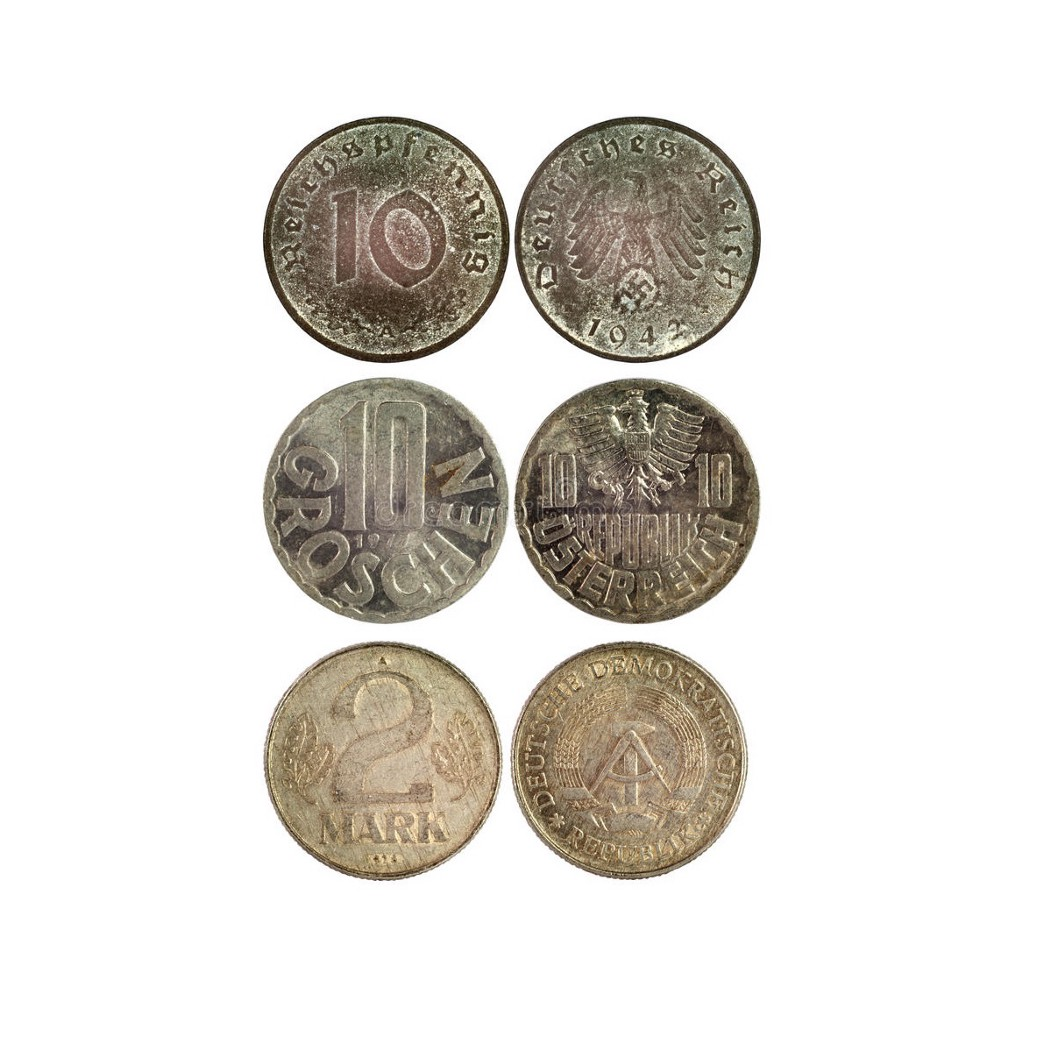

In [19]:
if not os.path.exists("coins.jpg"):
   !wget https://raw.githubusercontent.com/titocampos/Colaboratory/master/datasets/coins.jpg
img = cv2.imread("coins.jpg")
cv2_imshow(img)

Você pode observar os pontos brilhantes da moeda. Isso reduzirá a eficiência do algoritmo. Então, aplicaremos o método medianBlur, onde o primeiro parâmetro é a própria imagem e o segundo parâmetro é a taxa de desfoque. Se você usar imagens diferentes, poderá ajustar essa proporção de acordo com a sua imagem.

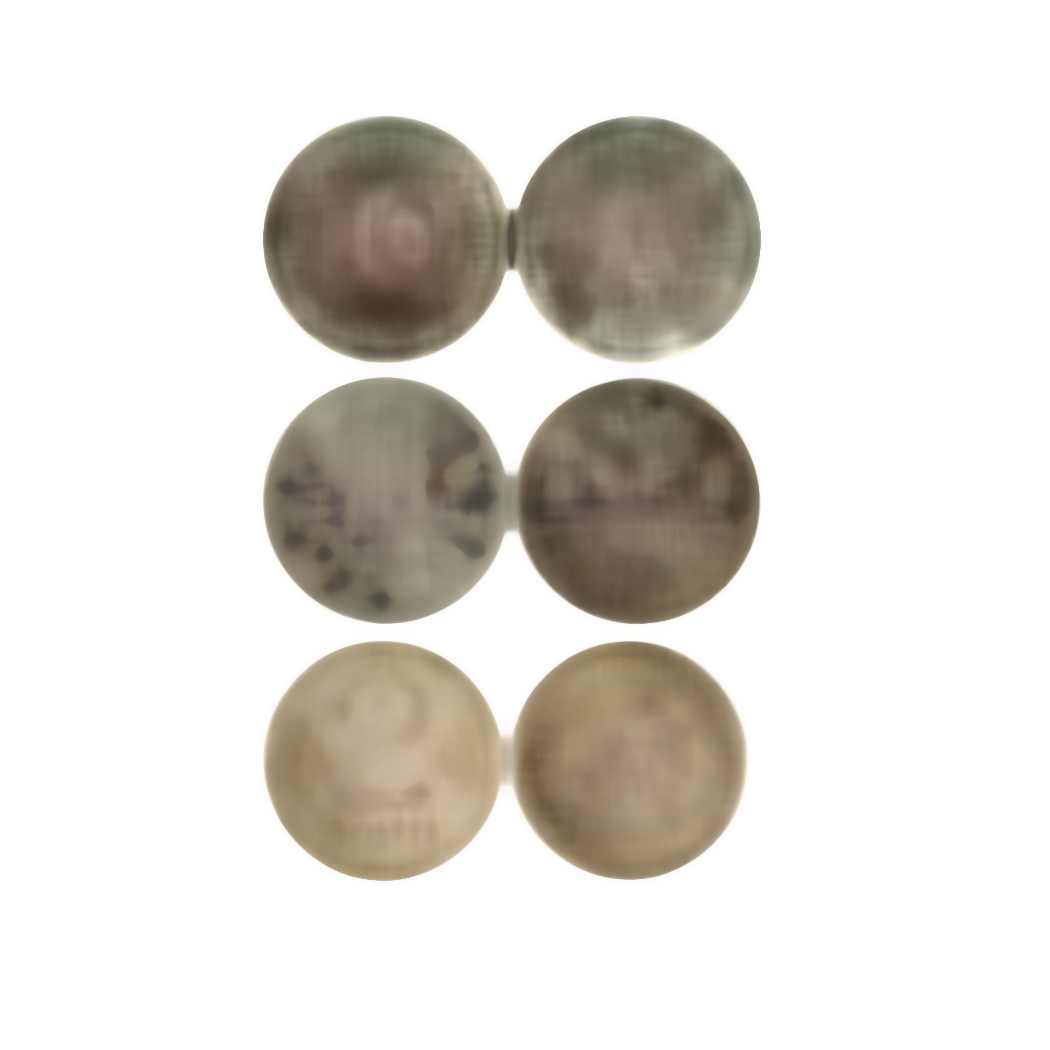

In [22]:
img_blur = cv2.medianBlur(img,25)
cv2_imshow(img_blur)

Uma das etapas mais importantes na detecção de objetos é tornar a imagem incolor. Então, transformaremos nossa imagem em um tom preto e branco. Isso geralmente é usado em todos os métodos de detecção de objetos. Isso permite que a imagem seja executada com mais eficiência, pois reduz o número de digitalizações.

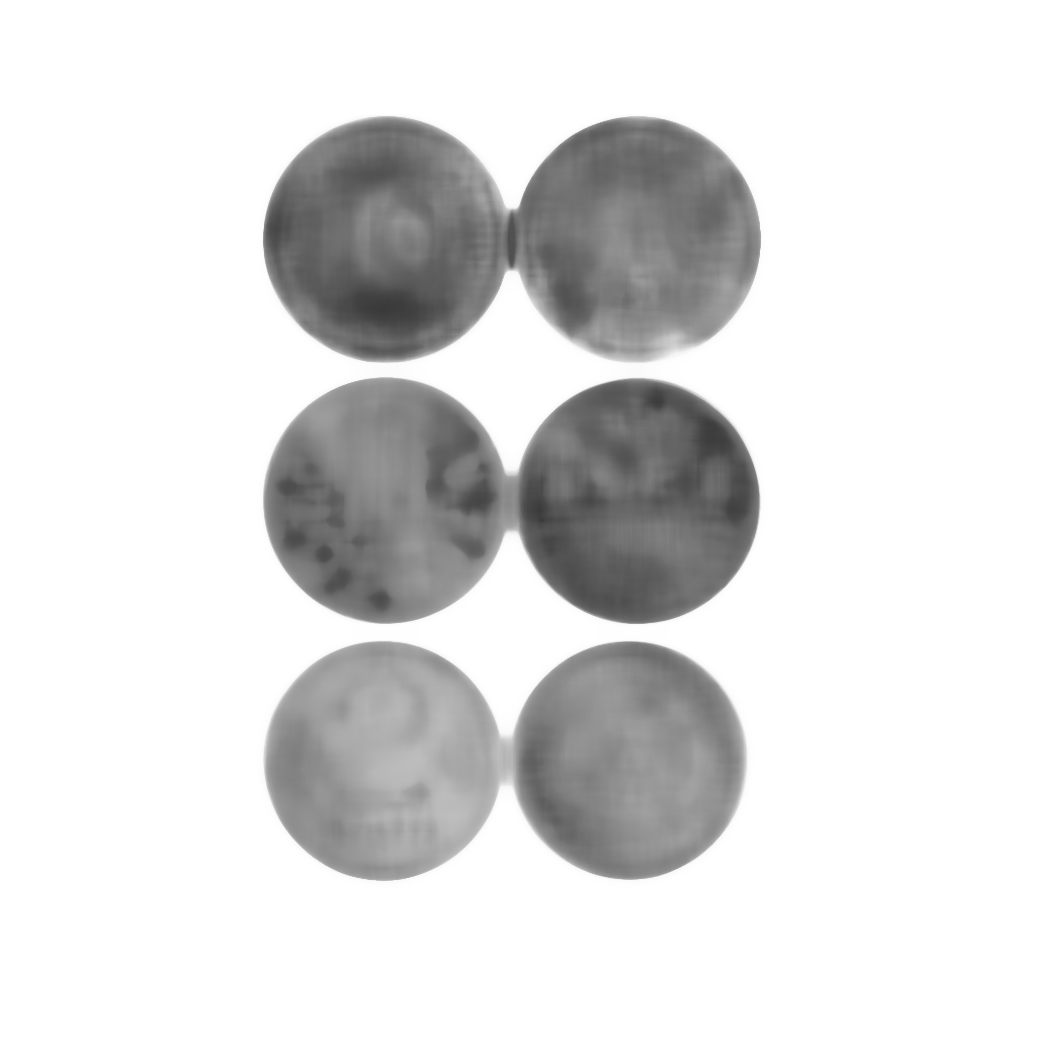

In [23]:
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

Se o valor do pixel for maior que o valor limite, é atribuído um valor (pode ser branco), ou outro valor (pode ser preto). A função usada é cv2.threshold. O primeiro argumento é a imagem de origem, que deve ser uma imagem em escala de cinza. O segundo argumento é o valor limite usado para classificar os valores de pixel. O terceiro argumento é o maxVal, que representa o valor a ser fornecido se o valor do pixel for maior que (às vezes menor que) o valor limite.

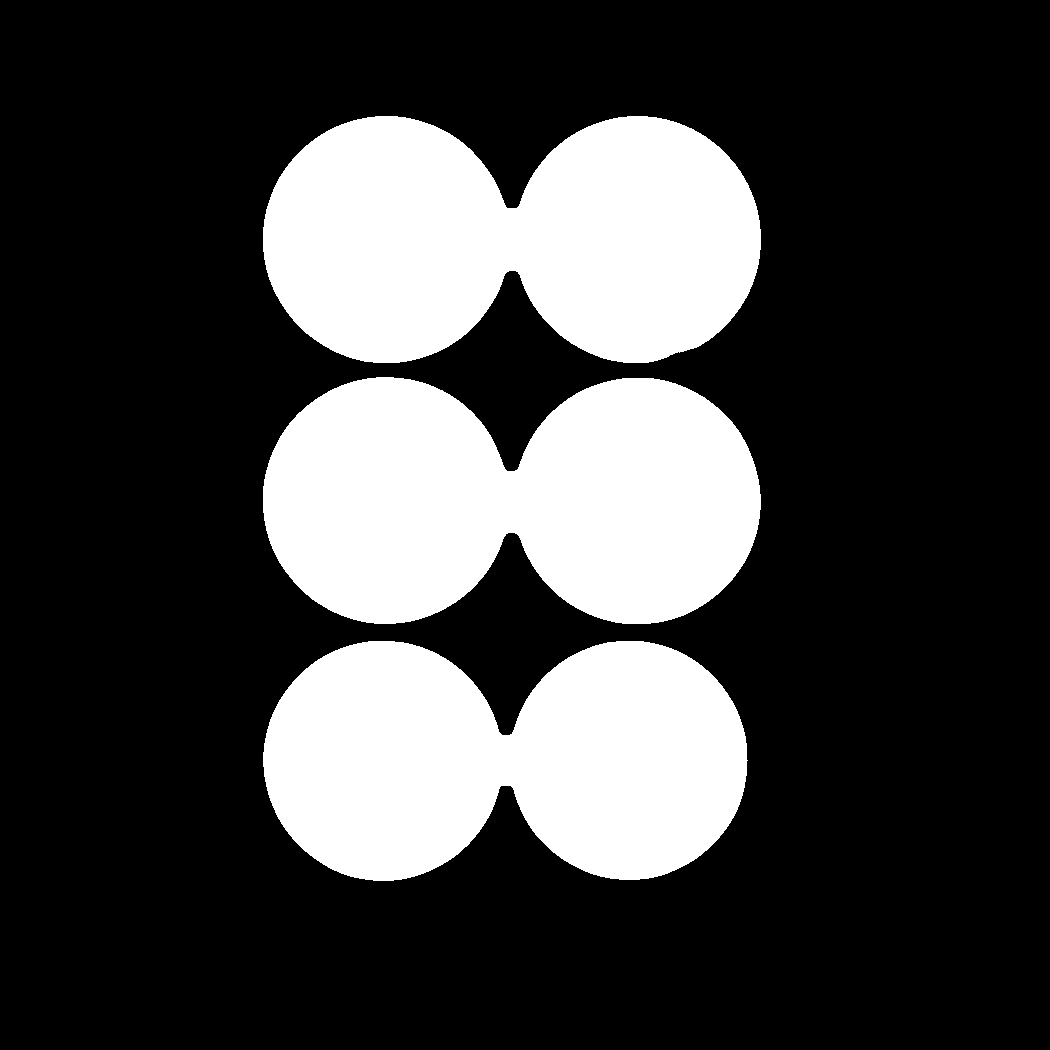

In [27]:
img_res ,img_thresh = cv2.threshold(img_gray,240,255,cv2.THRESH_BINARY_INV)
cv2_imshow(img_thresh) 

Eu preferi o método “THRESH_BINARY_INV” porque quero que as moedas permaneçam brancas aqui e o restante seja preto. Você pode escolher os valores apropriados de acordo com sua própria imagem.

Agora vamos criar um kernel aqui. Este kernel terá tamanho 3x3. Em seguida, aplicaremos isso à nossa imagem da seguinte maneira.

In [29]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_thresh,cv2.MORPH_OPEN,kernel) 

A razão para criar um kernel e aplicá-lo com o método morfologyEx é que, embora desfocemos a imagem, algumas pequenas áreas em preto ou branco (ruído) podem permanecer. Usamos esse método para destruí-los.

Agora é hora de substituir o valor de cada pixel pela distância do pixel de fundo mais próximo. Faremos isso usando o método distanceTransform. Quando aplicamos esse método, nosso tipo de matriz se transforma em float32. Então, faremos mais 2 etapas e converteremos nossa matriz novamente no tipo uint8.

In [30]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

Temos os últimos 2 blocos de código restantes. Nesta seção, agora processaremos a contagem de objetos e o registro das posições dos objetos. Usamos findContours para detectar objetos. Em seguida, tornamos nossa matriz regular com o método grap_contours.

In [32]:
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

E finalmente, mostraremos o resultado.

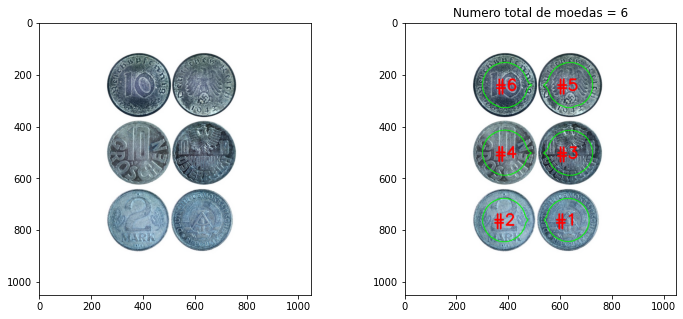

In [37]:
def display(img,count,cmap="gray"):
    f_image = cv2.imread("coins.jpg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Numero total de moedas = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(img, "#{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)

display(img,len(cnts))